In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [40]:
import warnings

warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("csv/ROOTALLRTTs25SEP - 5_oct.csv")

In [42]:
#g = sns.boxplot(x=df["std_RTT"])

In [43]:
#X= df.iloc[:, 7:39]

In [44]:
corr = df.corr()


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

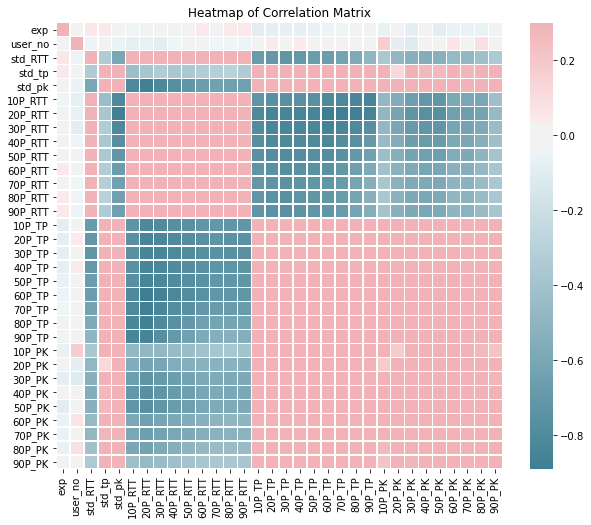

In [45]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [46]:
df.columns

Index(['exp', 'user_no', 'algo', 'interface', 'std_RTT', 'std_tp', 'std_pk',
       '10P_RTT', '20P_RTT', '30P_RTT', '40P_RTT', '50P_RTT', '60P_RTT',
       '70P_RTT', '80P_RTT', '90P_RTT', '10P_TP', '20P_TP', '30P_TP', '40P_TP',
       '50P_TP', '60P_TP', '70P_TP', '80P_TP', '90P_TP', '10P_PK', '20P_PK',
       '30P_PK', '40P_PK', '50P_PK', '60P_PK', '70P_PK', '80P_PK', '90P_PK'],
      dtype='object')

In [47]:
X= df.iloc[:, 7:39]

In [91]:
X.columns

Index(['10P_RTT', '20P_RTT', '30P_RTT', '40P_RTT', '50P_RTT', '60P_RTT',
       '70P_RTT', '80P_RTT', '90P_RTT', '10P_TP', '20P_TP', '30P_TP', '40P_TP',
       '50P_TP', '60P_TP', '70P_TP', '80P_TP', '90P_TP', '10P_PK', '20P_PK',
       '30P_PK', '40P_PK', '50P_PK', '60P_PK', '70P_PK', '80P_PK', '90P_PK'],
      dtype='object')

In [49]:
y = df.iloc[:, 3]

In [50]:
sm = SMOTE()
X, y = sm.fit_sample(X, y)

In [51]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [52]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((150, 27), (74, 27))

In [53]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [54]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=17)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=17)

In [55]:
y_pred_en = clf_en.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.8649


In [57]:
y_pred_train_en = clf_en.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8400


In [58]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8400
Test set score: 0.8649


In [59]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 9  3  0  0  0  0  0]
 [ 0 10  0  0  1  0  0]
 [ 0  0  8  0  0  0  0]
 [ 4  0  0 10  0  0  0]
 [ 2  0  0  0 10  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  9]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

     s1-eth1       0.60      0.75      0.67        12
     s1-eth2       0.77      0.91      0.83        11
     s2-eth1       1.00      1.00      1.00         8
     s2-eth2       1.00      0.71      0.83        14
     s3-eth1       0.91      0.83      0.87        12
     s3-eth2       1.00      1.00      1.00         8
     s8-eth1       1.00      1.00      1.00         9

    accuracy                           0.86        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.89      0.86      0.87        74



In [61]:
#MY Labeling is wrong

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=17)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [64]:
rf_predictions = rf.predict(X_test)
accuracy_score(y_test, rf_predictions)
print('Accuracy is ' + str(round(accuracy_score(y_test, rf_predictions),2)))

Accuracy is 0.92


In [65]:
forest_params = {'max_depth': range(10, 21),
                 'max_features': range(5, 105, 20)}

locally_best_forest = GridSearchCV(rf, forest_params,
                           cv=3, n_jobs=-1, verbose=True) 

locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 55 candidates, totalling 165 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:    5.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 21),
                         'max_features': range(5, 105, 20)},
             verbose=True)

In [66]:
locally_best_forest.best_params_

{'max_depth': 10, 'max_features': 25}

In [67]:
tuned_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=17)
tuned_forest.fit(X_train, y_train)
tuned_forest_predictions = tuned_forest.predict(X_test)
accuracy_score(y_test, tuned_forest_predictions)

0.918918918918919

In [68]:

print(classification_report(y_test, tuned_forest_predictions))

              precision    recall  f1-score   support

     s1-eth1       1.00      1.00      1.00        12
     s1-eth2       1.00      1.00      1.00        11
     s2-eth1       0.80      1.00      0.89         8
     s2-eth2       1.00      0.71      0.83        14
     s3-eth1       1.00      0.83      0.91        12
     s3-eth2       0.67      1.00      0.80         8
     s8-eth1       1.00      1.00      1.00         9

    accuracy                           0.92        74
   macro avg       0.92      0.94      0.92        74
weighted avg       0.94      0.92      0.92        74



In [69]:
cm = confusion_matrix(y_test, tuned_forest_predictions)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[12  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  8  0  0  0  0]
 [ 0  0  0 10  0  4  0]
 [ 0  0  2  0 10  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  9]]


In [72]:
tuned_forest.n_classes_

7